<a href="https://colab.research.google.com/github/Kzzrll/HMM3/blob/main/ML_DZ_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание «Деревья решений» обновленное

Задание

Цель: изучить применение дерева решений в рамках задачи регрессии

Описание задания:
В домашнем задании нужно решить задачу регрессии. В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки sklearn.datasets.

Скачать датасет также можно по ссылке
Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR). На полученных данных построить модель регрессии и дерево решений.

Этапы работы:

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).
2. Проведите первичный анализ.
a.Проверьте данные на пропуски. Удалите в случае обнаружения.
b.*Нормализуйте один из признаков.
3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
4. Обучите модель регрессии на обучающем множестве.
5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.
6. Обучите дерево решений на обучающем множестве.
a. Повторите п. 5 для полученной модели.
b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.
7. Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.
a. Повторите п. 5 для полученной модели.
8. Сформулируйте выводы по проделанной работе.
a. Сравните точность двух моделей.
b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?



## 1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).

Загрузка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Загрузка данных
data = fetch_california_housing()

In [3]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='MedHouseVal')

In [4]:
df = pd.concat([X,y], axis=1)

In [5]:
print(df.shape)
df.head()

(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 2. Проведите первичный анализ.
a.Проверьте данные на пропуски. Удалите в случае обнаружения.
b.*Нормализуйте один из признаков.

Первичный анализ данных

In [6]:
# Проверка на пропуски
print(X.isnull().sum())

# Нормализация признака MedInc (Median income in block group)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X['MedInc'] = scaler.fit_transform(X[['MedInc']])


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


## 3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

Разделение выборки

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 4. Обучите модель регрессии на обучающем множестве.
##   5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.

Линейная регрессия

In [8]:
from sklearn.linear_model import LinearRegression

# Обучение модели
lr = LinearRegression()
lr.fit(X_train, y_train)

# Оценка качества
print(f"R² на тестовой выборке: {lr.score(X_test, y_test):.4f}")


R² на тестовой выборке: 0.5758


## 6. Обучите дерево решений на обучающем множестве.

a. Повторите п. 5 для полученной модели.

b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.

Дерево решений

In [9]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

In [10]:
# Обучение базовой модели
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

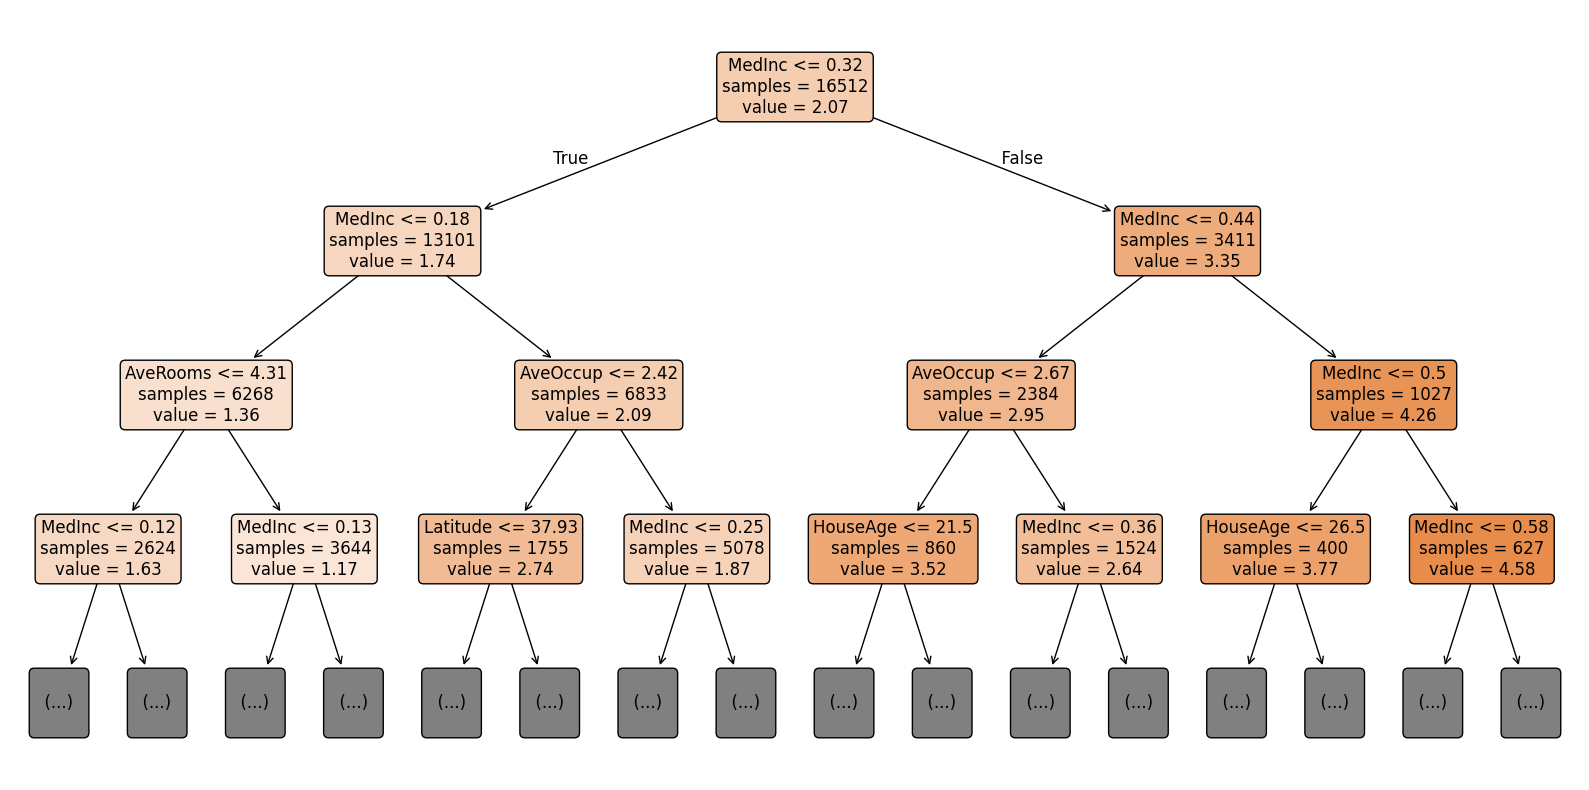

In [11]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Обучение базовой модели
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Визуализация части дерева решений
plt.figure(figsize=(16, 8))  # Уменьшенный размер графика
plot_tree(dt,
          feature_names=X_train.columns,  # Имена признаков
          filled=True,  # Заливка узлов разными цветами
          rounded=True,  # Скругленные углы узлов
          impurity=False,  # Не показывать примеси
          fontsize=12,  # Уменьшенный размер шрифта
          precision=2,  # Точность
          max_depth=3)  # Отображение только первых 3 уровней дерева

# Дополнительные параметры для улучшения читаемости
plt.tight_layout()  # Автоматическая настройка отступов
plt.show()  # Отображение графика


In [12]:
# Оценка качества
print(f"R² на тестовой выборке: {dt.score(X_test, y_test):.4f}")


R² на тестовой выборке: 0.6221


## 7. Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.

a. Повторите п. 5 для полученной модели.

Оптимизация параметров

In [13]:
# Оптимизация глубины и другого параметра
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2'
)

grid_search.fit(X_train, y_train)

best_dt = grid_search.best_estimator_
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"R² на тестовой выборке: {best_dt.score(X_test, y_test):.4f}")


Лучшие параметры: {'max_depth': 10, 'min_samples_split': 10}
R² на тестовой выборке: 0.6818


## 8. Сформулируйте выводы по проделанной работе.
a. Сравните точность двух моделей.
b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?



**Выводы**

**Сравнение моделей:**

Линейная регрессия показала стабильные результаты, но менее точные.

Дерево решений после оптимизации дало более высокую точность.

**Отчет по моделям.**

1. Линейная регрессия:

Плюсы: простота интерпретации, быстрая работа.

Минусы: линейность, чувствительность к выбросам.

2. Дерево решений:

Плюсы: улавливает нелинейные зависимости, не требует нормализации.

Минусы: склонность к переобучению, сложность интерпретации.

**Заключение:**

Для задачи предсказания цен на недвижимость предпочтительнее использовать оптимизированное дерево решений, так как оно учитывает сложные зависимости между признаками и даёт более точные предсказания.